# Fashion MNIST - Description

Objective

Fashion-MNIST is a dataset of Zalando's article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

The objective of the project is - to use Fashion-MNIST data set to identify (predict) different fashion products(articles) from the given images using Machine Learning.

**We will be following the below steps to solve this problem:**

Importing the libraries

Loading the data

Splitting the data

Visualizing the Data

Building the Model

Fitting the Model

Evaluating the Model Performance



## Importing the Modules

Let us start by importing the necessary modules.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
str(type(np))==str(type(tf))==str(type(keras))==str(type(plt))=="<class 'module'>"

True

In [ ]:
print(str(type(np)))

<class 'module'>


Check the version of tensorflow we imported as `tf`.

In [ ]:
tf.__version__

'2.3.0'

Check the version of keras.

In [ ]:
keras.__version__

'2.4.0'

## Loading the Dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

For more infor: https://github.com/zalandoresearch/fashion-mnist

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # sorting into test and train set

In [ ]:
type(fashion_mnist)

module

Let us see the shape of the dataset

In [ ]:
y_test.shape

(10000,)

In [ ]:
X_train_full.shape # checking the shape of the training set

(60000, 28, 28)

So, the training set contains 60,000 grayscale images, each 28x28 pixels.

## Splitting the Dataset

Though the dataset is already split for you between a training set and a test set, it can be useful to split the training set further to have a validation set. We shall do that here.

Let's split the full training set into a validation set and a (smaller) training set. We will also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let us print the shapes of the train data, validation data and test data.

In [ ]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


Thus, the train set contains 55000 images, the validation set contains 5,000 images, and the test set contains 10,000 images.

In [ ]:
y_valid.shape

(5000,)

## Visualizing the Data

With reference to the class labels and the class names as given in the [official documantation](https://keras.io/api/datasets/fashion_mnist/) of Keras, let us store all them in a list `class_names` as follows.

**Note:**

- `plt.imshow(X, cmap="binary")` displays `X` data as an image. `cmap` is used to map scalar data to colors. `cmap=binary` maps the image color to black and white format while displaying the image.

- `plt.axis('off')` is used to turn off the axes for subplots( you could remove this line and observe the difference for yourself).

- `plt.subplot(a,b)` is used to create a figure and a set of subplots with `a` rows and `b` columns.

- `plt.subplots_adjust()` is used to tune the subplot layout.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

Class label is: 4
Class name is: Coat


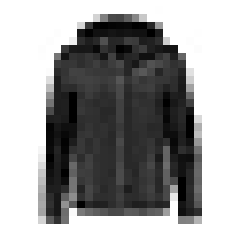

In [ ]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Let's take a look at a sample of the images in the dataset.

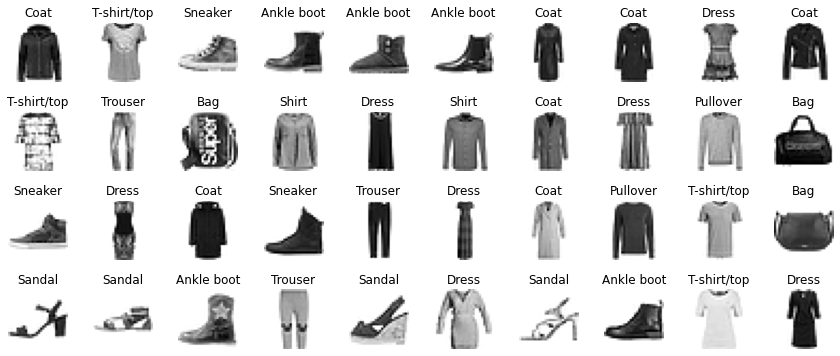

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
type(class_names)==list

True

## Building the Model

Let us build a neural network with Dense layers for this classification problem.


**Note:**

- `keras.layers.Flatten` : Flattens the input. 

- `keras.layers.Dense(300, activation="relu")` : Just your regular densely-connected NN layer with 300 neurons and `relu` activation function.

- **Why do we need clear_session?**

 It is useful when you're creating multiple models in successions, such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in the thousands) to the graph. Eventually, models will become slower and slower to train, and you may also run out of memory. Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.

-   We have set `accuracy` as a performance evaluation metric. Also, we set `sparse_categorical_crossentropy` as the loss function, as we have the labels which are not one-hot vectors but the integers. [More here][1].


  [1]: https://stackoverflow.com/a/58574260

In [ ]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
str(type(model))=="<class 'tensorflow.python.keras.engine.sequential.Sequential'>"

True

Let us view the layers of `model`.

In [ ]:
model.layers # viewing the layers

Let us view the summary of `model`.

In [ ]:
model.summary() # viewing the summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Let us plot the arcitecture of `model` and save it into `my_fashion_mnist_model.png` file.

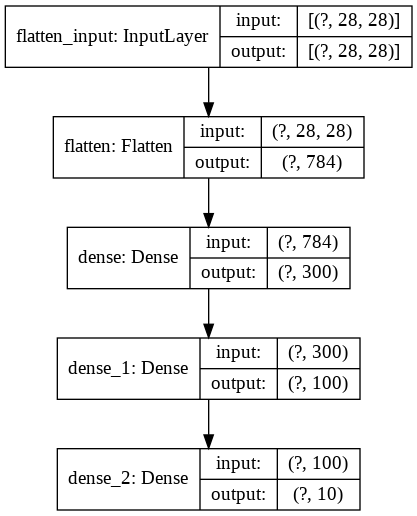

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
# Compiling the model we created

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

In [ ]:
str(type(sgd))=="<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>"

True

## Fitting the Model

Let us train the model on the train data. 

**Note:**

- `plt.gca()` is used to get a reference to the current axes, if you need to change the limits on the y-axis, for example.

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) # fitting the model to training data

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3616 - val_accuracy:

In [ ]:
history.params # getting the param history

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
hidden1 = model.layers[1] # first layer
print(hidden1.name)

dense


In [ ]:
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape)
weights

(784, 300)


array([[ 0.02428086, -0.00887323, -0.02189048, ..., -0.02774551,
         0.03858425, -0.0688953 ],
       [ 0.00458288, -0.03111992, -0.0586676 , ...,  0.00592398,
        -0.02764788, -0.04163158],
       [-0.06296419, -0.06925985,  0.07103908, ..., -0.04251737,
         0.07120442, -0.07321373],
       ...,
       [-0.01632773,  0.02111968, -0.0539108 , ...,  0.0004669 ,
         0.00109048,  0.06340604],
       [ 0.07269625, -0.07056581,  0.07043578, ..., -0.00106114,
        -0.00143984,  0.03149685],
       [-0.06228265,  0.01555363, -0.02585149, ..., -0.00459388,
         0.00229201, -0.06755522]], dtype=float32)

In [ ]:
biases

array([ 1.72597662e-01,  4.25429009e-02, -6.07024645e-04, -1.01422556e-01,
       -1.05972553e-03,  9.66370851e-02,  4.89848256e-02, -9.71551333e-03,
       -2.30814833e-02,  6.52581230e-02, -3.87009862e-03, -1.26684671e-02,
        9.23488811e-02,  2.88585923e-03,  1.69026703e-01,  8.20578560e-02,
       -2.40480062e-02,  4.61730100e-02,  1.04844220e-01, -1.25508487e-01,
        1.16227746e-01,  1.39526084e-01,  1.10355613e-03,  4.31443565e-02,
        5.32702543e-02,  4.83702496e-02, -5.66375814e-03,  2.20381722e-01,
        1.57303751e-01,  1.80797577e-02,  1.08178541e-01, -4.68017533e-03,
        4.88409027e-02, -3.09294951e-03, -3.17571387e-02,  3.99062634e-02,
        1.42429829e-01, -8.39695632e-02,  1.99106812e-01, -6.35627136e-02,
        4.39909287e-02,  1.77721362e-04,  6.76236302e-02,  2.78168526e-02,
        6.37718150e-03, -1.07253276e-01, -1.08806500e-02,  7.13852793e-02,
        4.48315684e-03,  1.49062440e-01, -1.56649190e-03,  1.72517523e-01,
        1.22344241e-01, -

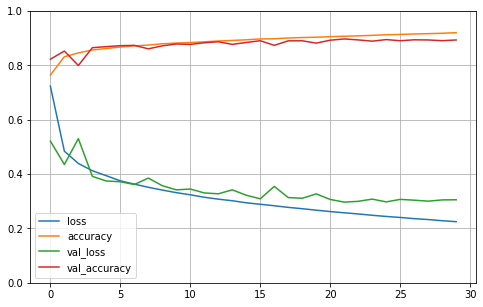

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [ ]:
str(type(history))=="<class 'tensorflow.python.keras.callbacks.History'>"

True

## Evaluating the Model Perormance

In [ ]:
model.evaluate(X_test, y_test) # Evaluating the model

313/313 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8822


[0.3381877839565277, 0.8822000026702881]

Let us predict and visualize the first 3 samples from the test data.

In [ ]:
y_pred = model.predict_classes(X_test[:3])
print(y_pred)
print([class_names[index] for index in y_pred])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


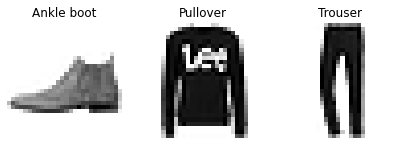

In [ ]:
plt.figure(figsize=(7, 3))
for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [ ]:
str(type(y_pred))=="<class 'numpy.ndarray'>"

True